In [23]:
import numpy as np
import matplotlib as mpl


## 1.采样数据并加入噪声

In [24]:
def load_data():
    data=list()
    for i in range(100):
        x=np.random.uniform(-10.,10.)
        eps=np.random.normal(0.,1)
        y=1.447*x+0.089+eps
        data.append([x,y])
    data=np.array(data)
    data2=np.genfromtxt('data.csv',delimiter=',')

    return data2

## 2.计算误差

In [25]:
def mse(b,w,points):
    total_error=0
    for i in range(0,len(points)):
        x=points[i,0]
        y=points[i,1]
        total_error+=(y-(w*x+b))**2
    return total_error/float(len(points))

In [26]:
## 3.计算梯度

In [27]:
def step_gradient(b_current,w_current,points,lr):
    b_gradient=0
    w_gradient=0
    M=float(len(points))
    for i in range(0,len(points)):
        x=points[i,0]
        y=points[i,1]
        b_gradient+=(2/M)*((w_current*x+b_current)-y)
        w_gradient+=(2/M)*x*((w_current*x+b_current)-y)
    new_b=b_current-lr*b_gradient
    new_w=w_current-lr*w_gradient
    return [new_b,new_w]

## 4.梯度更新

In [28]:
all_loss=[]
def gradient_descent(points,starting_b,starting_w,lr,num_iterations):
    global all_loss
    b=starting_b
    w=starting_w
    for step in range(num_iterations):
        b,w=step_gradient(b_current=b,w_current=w,points=np.array(points),lr=lr)
        loss=mse(b,w,points)
        all_loss.append(loss)
        if step%50==0:
            print(f"iteration:{step}, loss:{loss}, w:{w}, b:{b}")
    return [b,w]

## 5.main

In [29]:
b=0
w=0
def main():
    global b
    global w
    lr=0.0001
    initial_b=0
    initial_w=0
    num_iterations=1000

    data=load_data()
    [b,w]=gradient_descent(data,initial_b,initial_w,lr,num_iterations)
    loss=mse(b,w,data)
    print(f'Final loss:{loss}, w:{w}, b:{b}')

main()

iteration:0, loss:1484.586557408649, w:0.7370702973591052, b:0.014547010110737297
iteration:50, loss:112.64882489409928, w:1.4788605608606418, b:0.032131992902294806
iteration:100, loss:112.64702056974568, w:1.4788015372774521, b:0.035135020029129285
iteration:150, loss:112.64521760674101, w:1.4787425359648851, b:0.03813691406164161
iteration:200, loss:112.64341600405817, w:1.478683556914539, b:0.04113767542736797
iteration:250, loss:112.64161576067083, w:1.478624600118013, b:0.044137304553683254
iteration:300, loss:112.63981687555349, w:1.4785656655669115, b:0.047135801867801
iteration:350, loss:112.63801934768121, w:1.47850675325284, b:0.05013316779677366
iteration:400, loss:112.63622317603011, w:1.4784478631674083, b:0.05312940276749252
iteration:450, loss:112.63442835957675, w:1.4783889953022293, b:0.05612450720668775
iteration:500, loss:112.63263489729884, w:1.478330149648919, b:0.05911848154092854
iteration:550, loss:112.63084278817455, w:1.478271326199096, b:0.06211132619662314


尝试画出生成的散点图和拟合的曲线

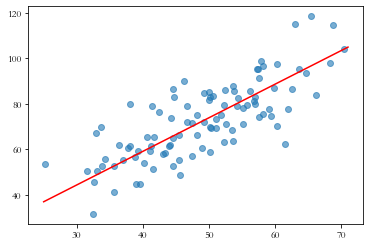

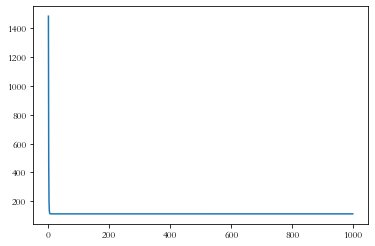

In [30]:
import matplotlib.pyplot as plt
import math
## 散点
data=load_data()
##拟合的曲线
x=np.linspace(math.floor(min(data[:,0])),math.ceil(max(data[:,0])),100)
y=w*x+b

plt.scatter(data[:,0],data[:,1],alpha=0.6)
plt.plot(x,y,color='r')
plt.show()

iter=range(0,len(all_loss))
plt.plot(iter,all_loss)
plt.show()
